In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
from IPython.display import HTML

import random, operator, time, itertools, math
import numpy

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.usetex'] = False
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

In [24]:
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours): 
    "Return the tour with the minimum total distance."
    return min(tours, key=total_distance)

alltours = itertools.permutations # The permutation function is already defined in the itertools module
cities = {1, 2, 3}
list(alltours(cities))

def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

In [25]:
City = complex # Constructor for new cities, e.g. City(300, 400)

def distance(A, B): 
    "The Euclidean distance between two cities."
    return abs(A - B)

A = City(300, 0)
B = City(0, 400)
distance(A, B)

def generate_cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), 
                    random.randrange(10, 590)) 
               for c in range(n))

cities8, cities10, cities100, cities1000 = generate_cities(8), generate_cities(10), generate_cities(100), generate_cities(1000)
cities8

{(18+39j),
 (205+111j),
 (456+337j),
 (537+549j),
 (663+112j),
 (676+393j),
 (721+384j),
 (817+240j)}

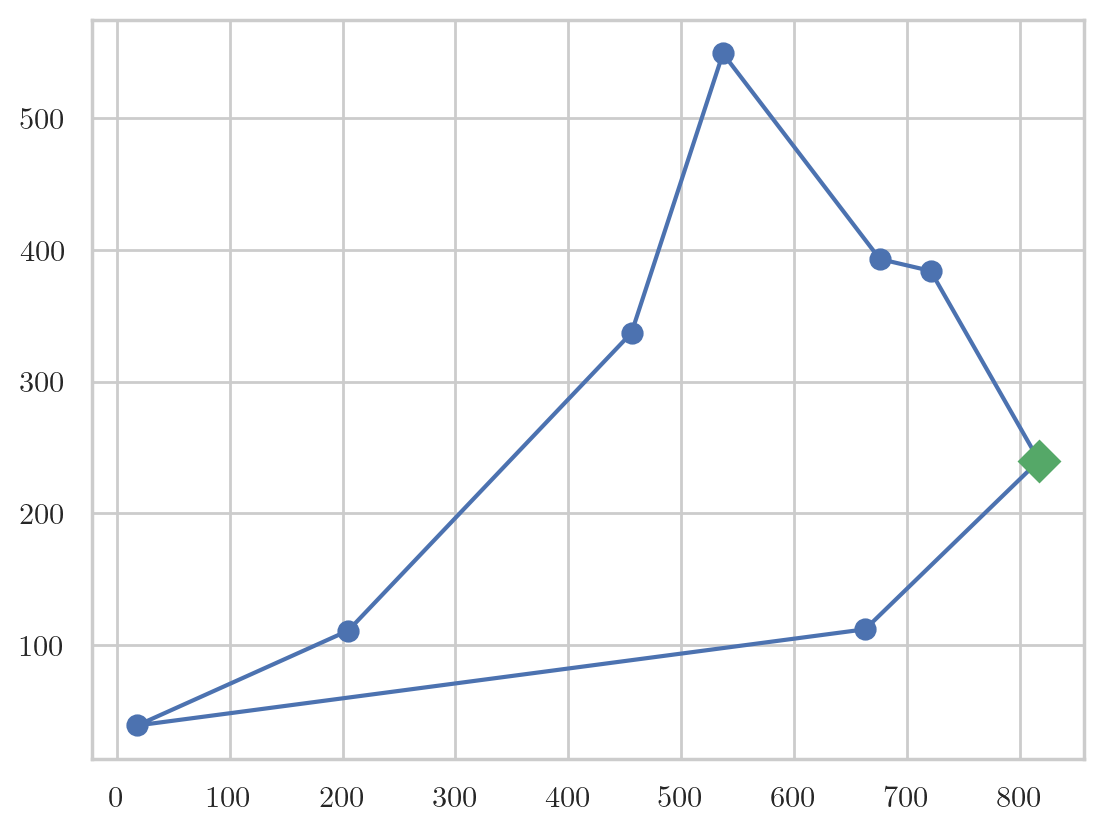

In [26]:
def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    # plt.show()
    
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

tour = exact_TSP(cities8)
plot_tour(tour)

In [27]:
def all_non_redundant_tours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    return [[start] + list(tour)
            for tour in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    for x in collection: return x

def exact_non_redundant_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(all_non_redundant_tours(cities))
all_non_redundant_tours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

In [28]:
%timeit exact_TSP(cities8)

%timeit exact_non_redundant_TSP(cities8)

%timeit exact_non_redundant_TSP(cities10)

102 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
13.6 ms ± 549 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.17 s ± 140 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour
def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

114 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


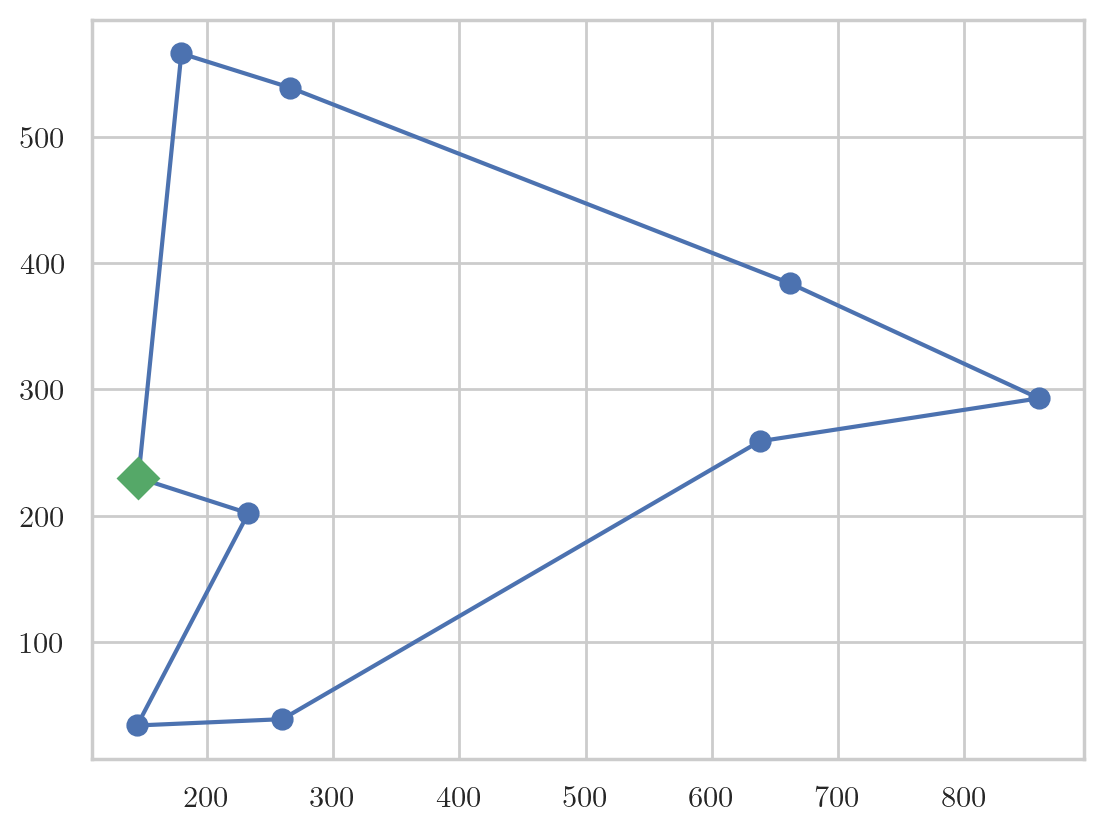

In [30]:
cities = generate_cities(9)
%timeit exact_non_redundant_TSP(cities)

plot_tour(exact_non_redundant_TSP(cities))

13.9 μs ± 525 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.28 ms ± 38.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


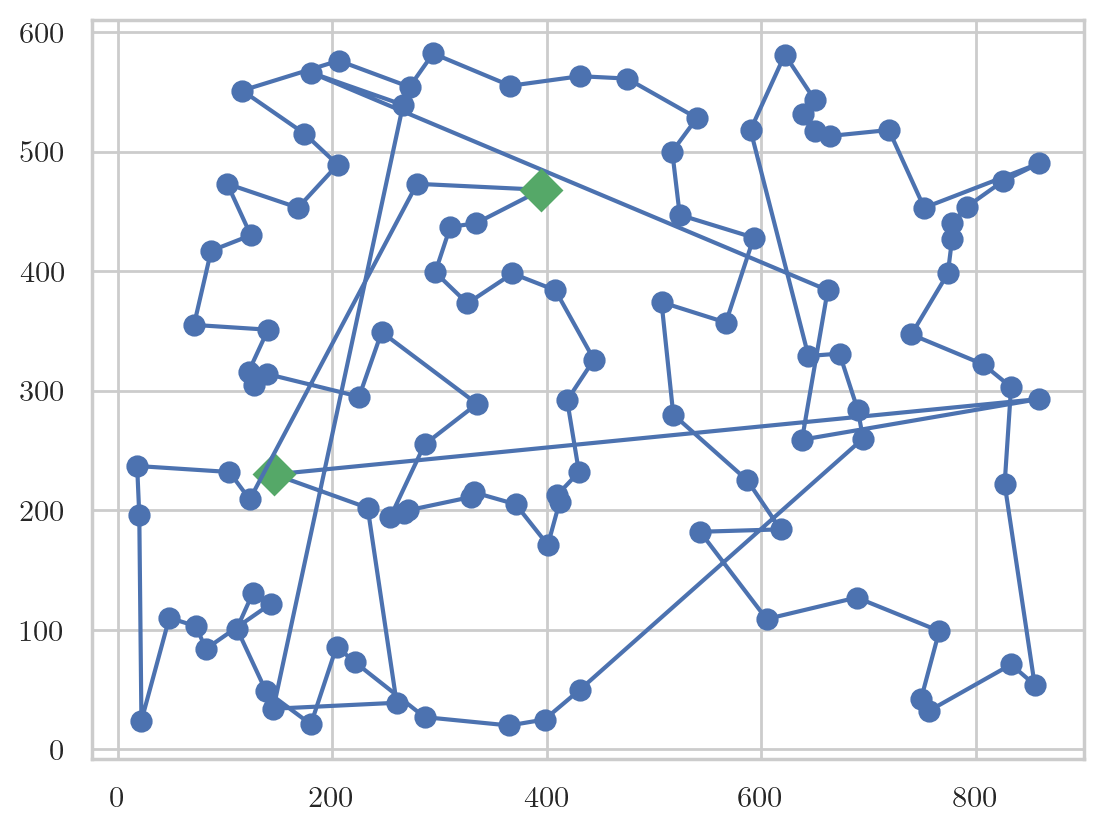

In [31]:
%timeit greedy_TSP(cities)

plot_tour(greedy_TSP(cities))

%timeit greedy_TSP(cities100)

plot_tour(greedy_TSP(cities100))

124 ms ± 6.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


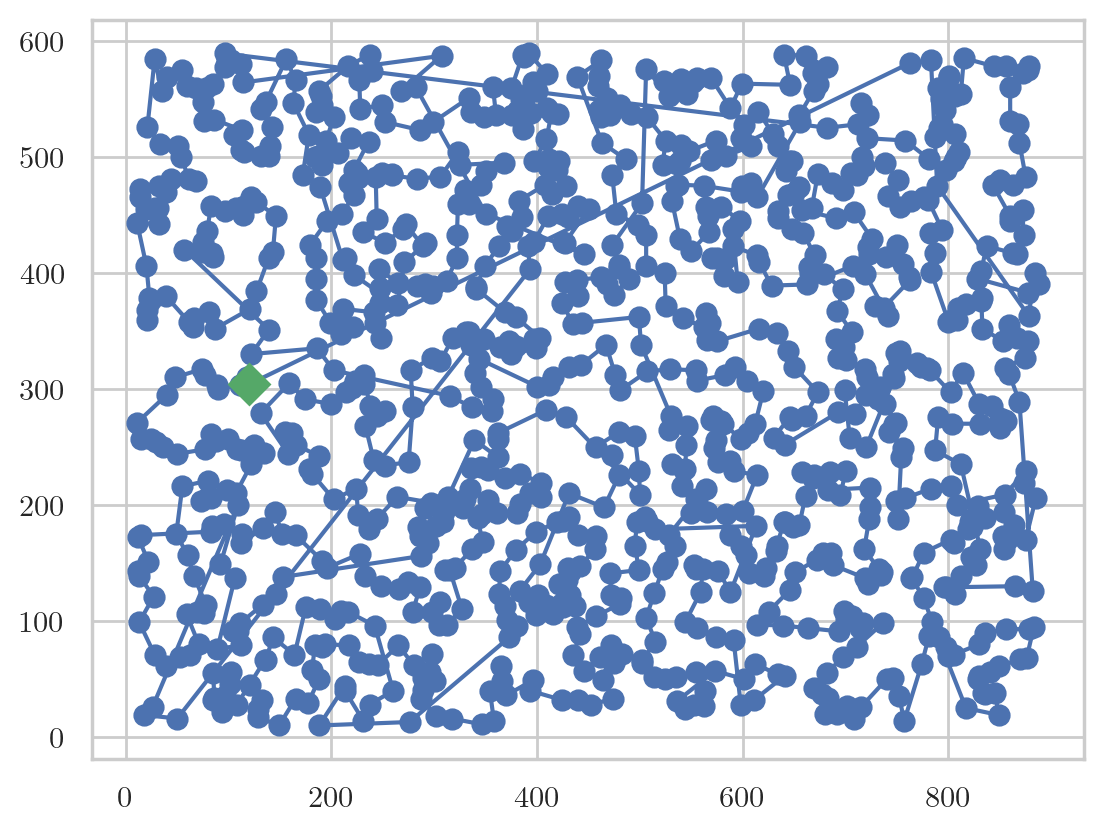

In [32]:
%timeit greedy_TSP(cities1000)

plot_tour(greedy_TSP(cities1000))



In [33]:
from deap import algorithms, base, creator, tools

In [34]:
num_cities = 30
cities = generate_cities(num_cities)

toolbox = base.Toolbox()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)




C:\Users\Victor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Victor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Fitness of the best individual:  3685.3553756884794


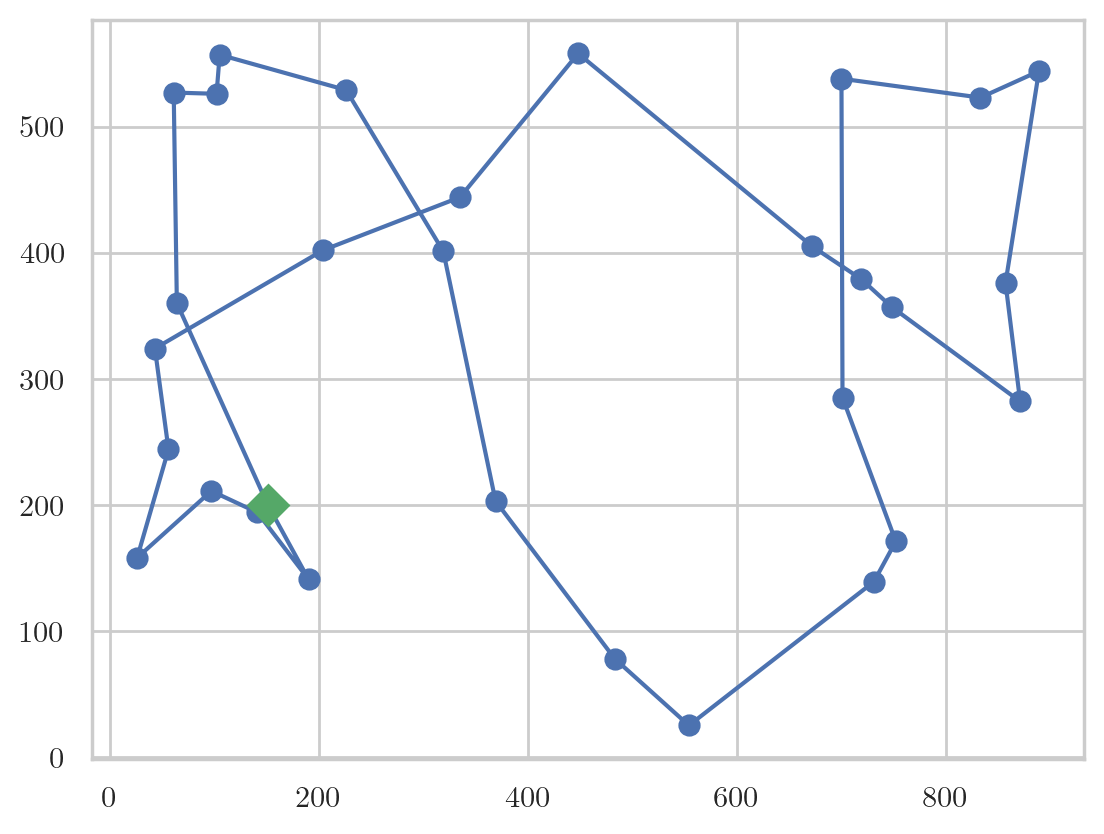

In [35]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)


def create_tour(individual):
    return [list(cities)[e] for e in individual]

def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)
toolbox.register("evaluate", evaluation)

toolbox.register("select", tools.selTournament, tournsize=3)
pop = toolbox.population(n=100)

result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)
best_individual = tools.selBest(result, k=1)[0]
print('Fitness of the best individual: ', evaluation(best_individual)[0])

plot_tour(create_tour(best_individual))

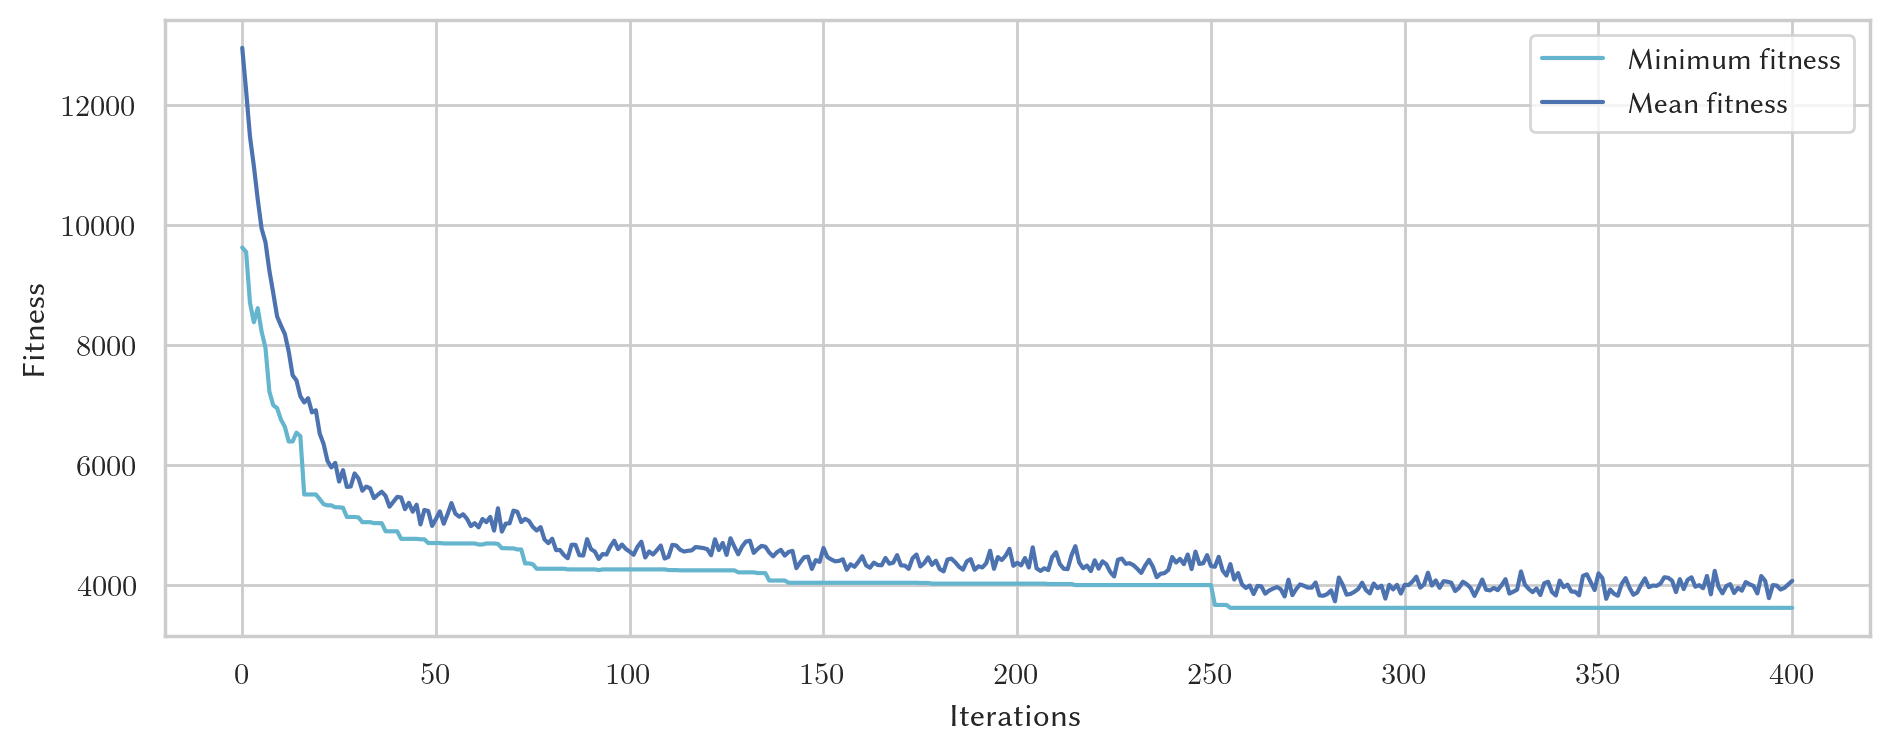

In [36]:
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', numpy.mean)
fit_stats.register('min', numpy.min)

result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox,
                                  cxpb=0.5, mutpb=0.2,
                                  ngen=400, verbose=False,
                                  stats=fit_stats)

plt.figure(figsize=(11, 4))
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-')
plt.legend(plots, ('Minimum fitness', 'Mean fitness'), frameon=True)
plt.ylabel('Fitness'); plt.xlabel('Iterations');

In [37]:
pop_stats = tools.Statistics(key=numpy.copy)
pop_stats.register('pop', numpy.copy) # -- copies the populations themselves
pop_stats.register('fitness', # -- computes and stores the fitnesses
                   lambda x : [evaluation(a) for a in x]) 

result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox,
                                  cxpb=0.5, mutpb=0.2,
                                  ngen=400, verbose=False,
                                  stats=pop_stats)

def plot_population(record, min_fitness, max_fitness):
    '''
    Plots all individuals in a population. 
    Darker individuals have a better fitness.
    '''
    pop = record['pop']
    fits = record['fitness']
    index = sorted(range(len(fits)), key=lambda k: fits[k])

    norm=colors.Normalize(vmin=min_fitness,
                          vmax=max_fitness)
    sm = cmx.ScalarMappable(norm=norm, 
                            cmap=plt.get_cmap('PuBu'))
    
    for i in range(len(index)):
        color = sm.to_rgba(max_fitness - fits[index[i]][0])
        plot_tour(create_tour(pop[index[i]]), alpha=0.5, color=color)

C:\Users\Victor\AppData\Local\Temp\ipykernel_9664\484635728.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)


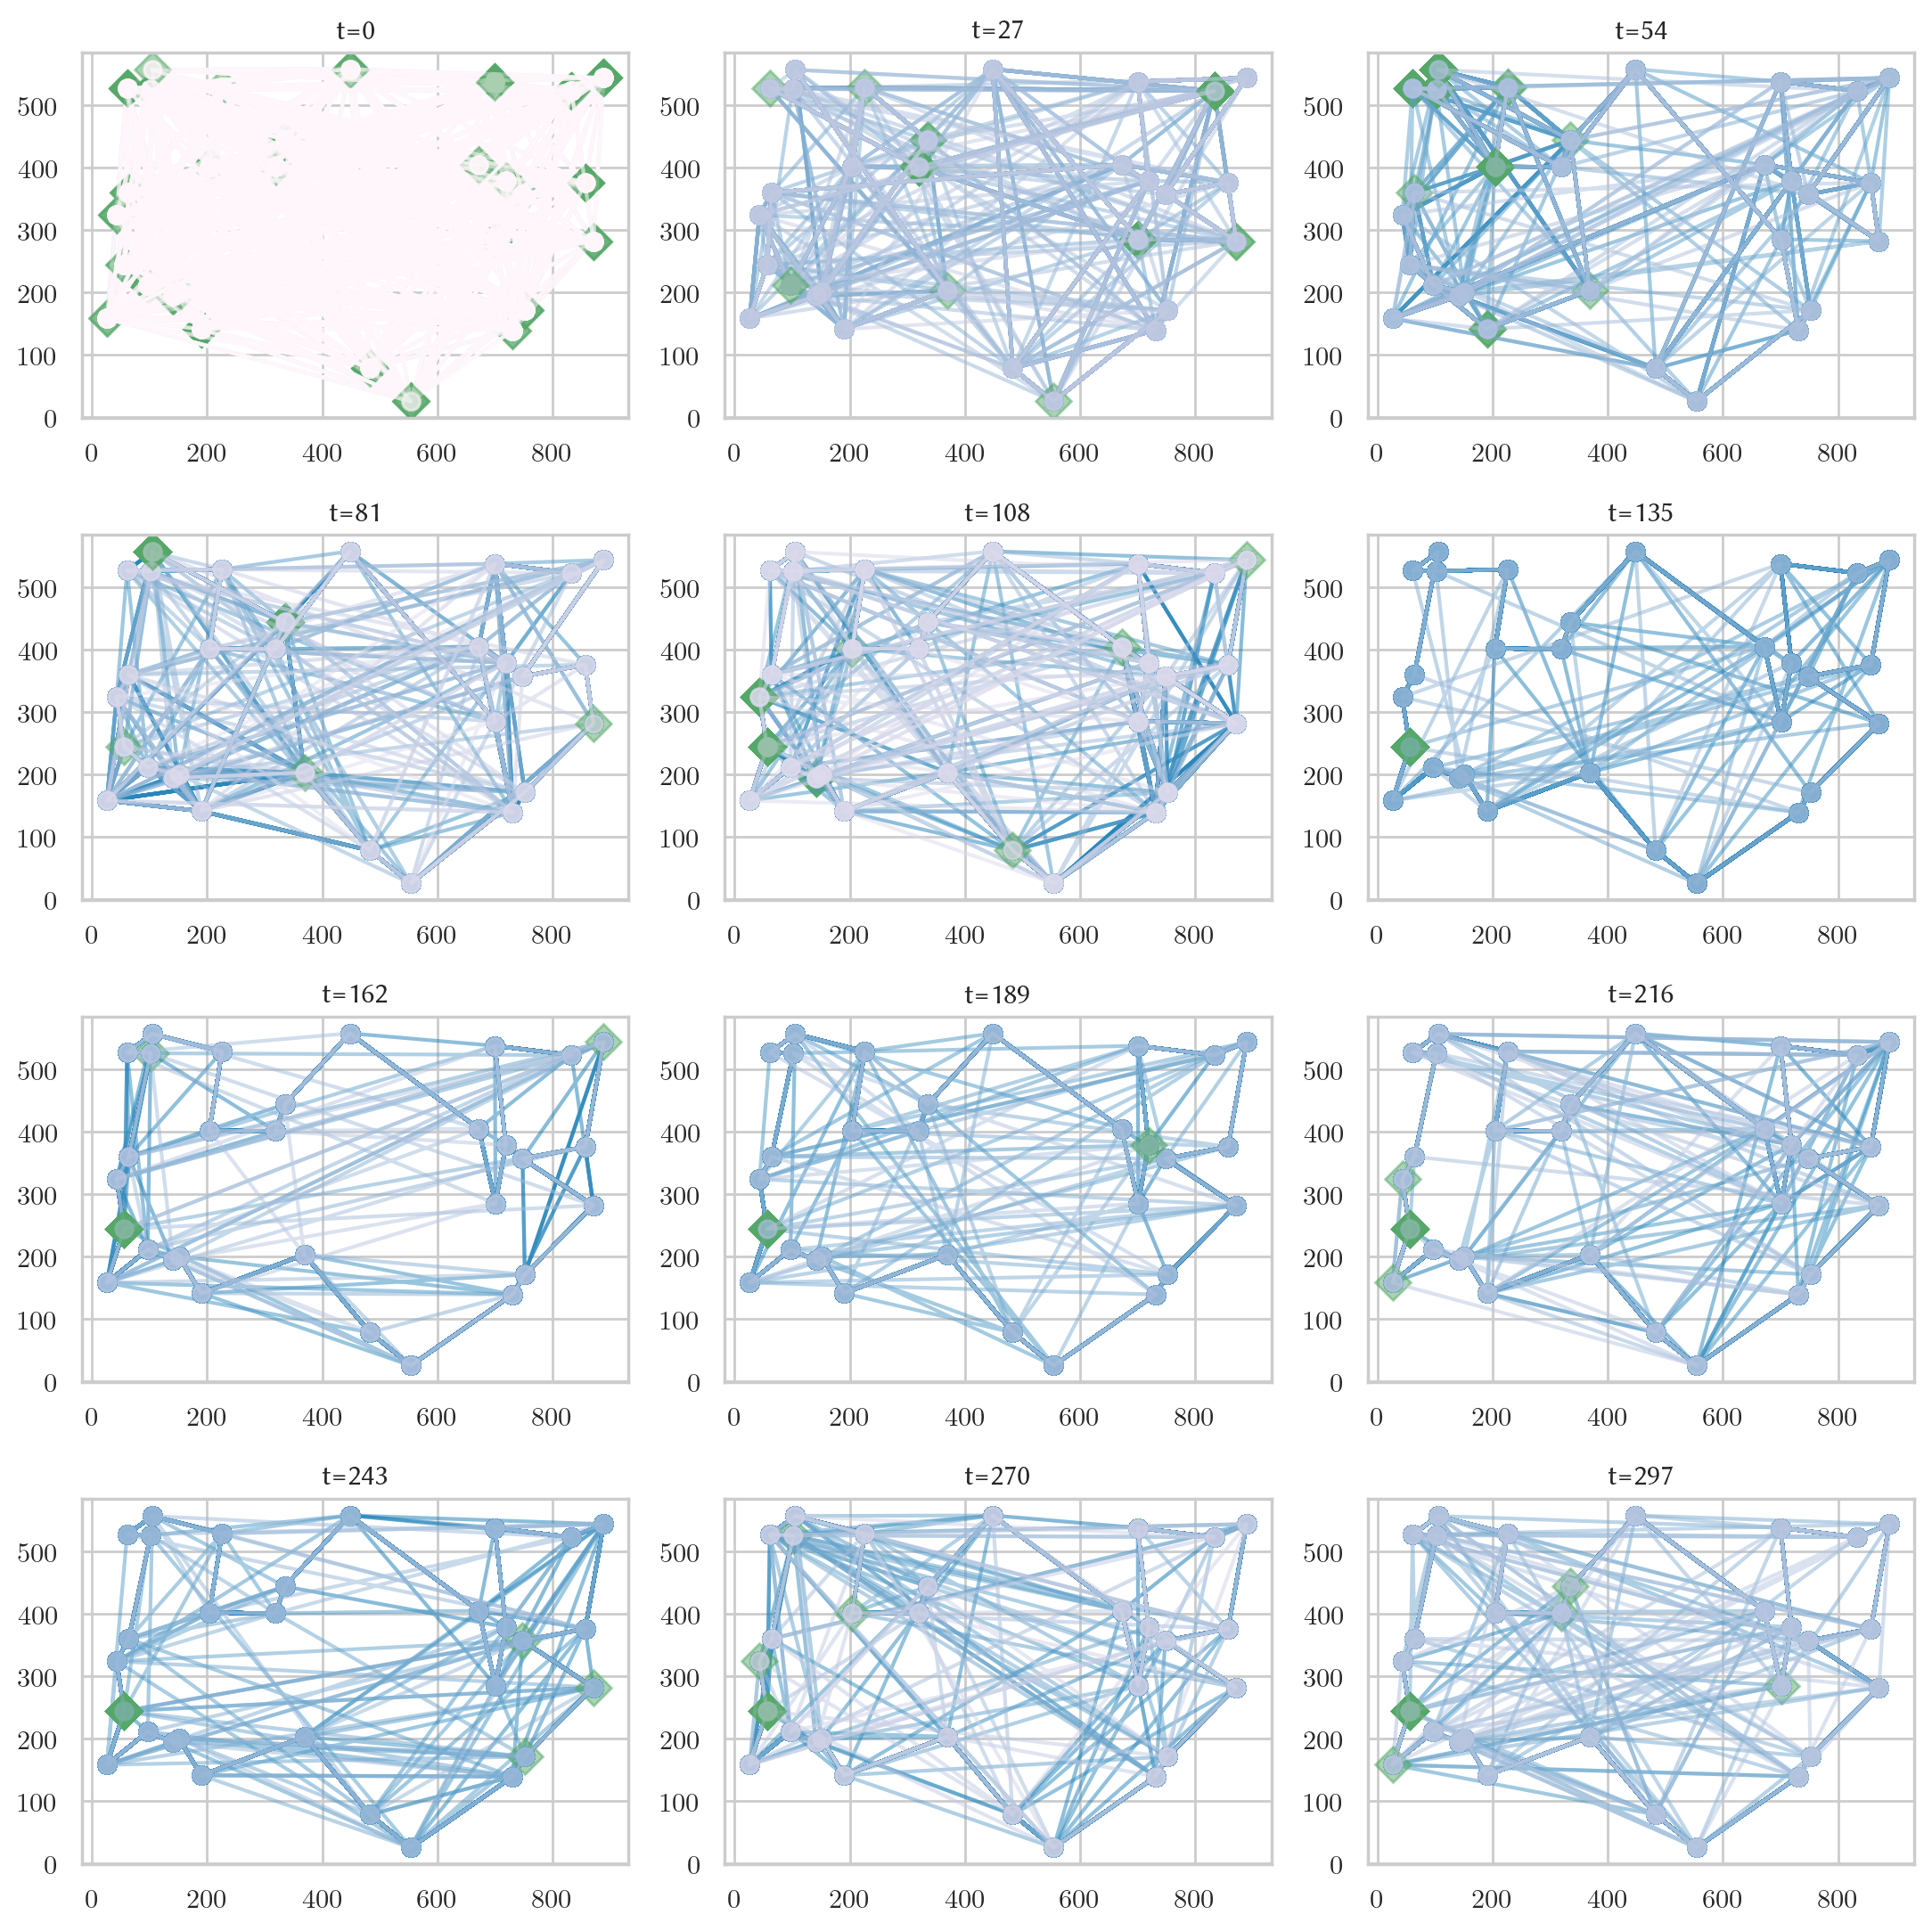

In [38]:
min_fitness = numpy.min(log.select('fitness'))
max_fitness = numpy.max(log.select('fitness'))

plt.figure(figsize=(11,11))
for i in range(0, 12):
    plt.subplot(4,3,i+1)
    it = int(math.ceil((len(log)-1.)/15))
    plt.title('t=' + str(it*i))
    plot_population(log[it*i], min_fitness, max_fitness)
plt.tight_layout()

In [39]:
from matplotlib import animation
from IPython.display import HTML
def update_plot_tour(plot, points, alpha=1, color='blue'):
    'A function for updating a plot with an individual'
    X, Y = XY(list(points) + [points[0]])
    plot.set_data(X, Y)
    plot.set_color(color)
    return plot
def init():
    'Initialization of all plots to empty data'
    for p in list(tour_plots):
        p.set_data([], [])
    return tour_plots
def animate(i):
    'Updates all plots to match frame _i_ of the animation' 
    pop = log[i]['pop']
    fits = log[i]['fitness']
    index = sorted(range(len(fits)), key=lambda k: fits[k])

    norm=colors.Normalize(vmin=min_fitness,
                          vmax=max_fitness)
    sm = cmx.ScalarMappable(norm=norm, 
                            cmap=plt.get_cmap('PuBu'))
    for j in range(len(tour_plots)):
        color = sm.to_rgba(max_fitness - fits[index[j]][0])
        update_plot_tour(tour_plots[j], 
                         create_tour(pop[index[j]]), 
                         alpha=0.5, color=color)
    return tour_plots

In [40]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 900), ylim=(0, 600))
tour_plots = [ax.plot([], [], 'bo-', alpha=0.1) for i in range(len(log[0]['pop']))]
tour_plots = [p[0] for p in tour_plots]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=60, blit=True)
plt.close()
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [42]:
%timeit total_distance(greedy_TSP(cities))

print('greedy_TSP() distance: ', total_distance(greedy_TSP(cities)))
print('Genetic algorithm best distance: ', evaluation(best_individual)[0])

%load_ext version_information
%version_information scipy, numpy, matplotlib, seaborn, deap

from IPython.core.display import HTML
from urllib.request import urlopen
HTML(urlopen('https://raw.githubusercontent.com/lmarti/jupyter_custom/master/custom.include').read().decode('utf-8'))

145 μs ± 26.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
greedy_TSP() distance:  3935.7244779821885
Genetic algorithm best distance:  3685.3553756884794
